## Лабораторная работа №1 | Вариант 6

Выполнил: Горячев Александр

### 1. Numpy

In [4]:
import numpy as np

1. Создайте единичную матрицу размером 3х3

In [5]:
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

2. Создайте матрицу 5х5 со значениями 1, 2, 3, 4 ниже диагонали

In [6]:
np.diag([1, 2, 3, 4], k=-1)

array([[0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 2, 0, 0, 0],
       [0, 0, 3, 0, 0],
       [0, 0, 0, 4, 0]])

3. Какой выход будет у данного скрипта

```python
# Author: Jake VanderPlas

print(sum(range(5),-1))
from numpy import *
print(sum(range(5),-1))

Сначала 9, потом 10. До импорта numpy функция sum это встроенная питоновская, которая берет второй аргумент как стартовое значение. После from numpy import * функция sum становится numpy.sum, где -1 это параметр axis, и она просто суммирует массив.
```

4. Как найти самое часто встречаемое значение между двумя массивами? 

In [ ]:
'''
Объединяем два массива и находим самое частое значение.
np.unique с return_counts для подсчета частот.
'''
a = np.array([1, 2, 3, 2, 1])
b = np.array([2, 3, 2, 4, 1])
combined = np.concatenate([a, b])
values, counts = np.unique(combined, return_counts=True)
most_frequent = values[np.argmax(counts)]
most_frequent


np.int64(2)

5. Как игнорировать все warnings в numpy(не нужно так делать, но покажи)?

In [8]:
import warnings
np.seterr(all='ignore')
warnings.filterwarnings('ignore')

6. Реализуем функцию-генератор, которая генерирует 10 целых чисел и используем ее для построения массива

In [9]:
def number_generator():
    for i in range(10):
        yield i

arr = np.array(list(number_generator()))
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

7. Создайте массив случайных чисел размером 10 и отсортируйте его

In [10]:
random_arr = np.random.random(10)
sorted_arr = np.sort(random_arr)
sorted_arr

array([0.08490577, 0.21202308, 0.28581479, 0.29367737, 0.35215317,
       0.41667251, 0.51438401, 0.65380317, 0.71303371, 0.85812591])

8. Создайте случайную матрицу 10х2 которая представляет собой декартовые координаты и преобразуйте их в полярные

In [11]:
dec = np.random.random((10, 2)) * 10
r = np.sqrt(dec[:, 0]**2 + dec[:, 1]**2)
teta = np.arctan2(dec[:, 1], dec[:, 0])
polar = np.column_stack([r, teta])
polar

array([[ 8.06543111,  1.4721632 ],
       [ 6.64983105,  0.61711591],
       [ 7.1757113 ,  0.24204569],
       [ 1.68683026,  1.40273372],
       [11.42962784,  0.60209723],
       [10.78865253,  0.93866377],
       [ 5.739374  ,  0.57042001],
       [ 5.09643389,  0.67912841],
       [ 3.37202369,  1.31825188],
       [10.68458125,  0.87166454]])

9. Создайте структурированный массив который будет описывать пиксель(координату x, y и цвет r,g,b)

In [12]:
pixel_dtype = np.dtype([('x', 'i4'), ('y', 'i4'), ('r', 'u1'), ('g', 'u1'), ('b', 'u1')])
pixels = np.array([(10, 20, 255, 0, 0), (30, 40, 0, 255, 0), (50, 60, 0, 0, 255)], dtype=pixel_dtype)
pixels

array([(10, 20, 255,   0,   0), (30, 40,   0, 255,   0),
       (50, 60,   0,   0, 255)],
      dtype=[('x', '<i4'), ('y', '<i4'), ('r', 'u1'), ('g', 'u1'), ('b', 'u1')])

10. Как конвертировать тип массив от float32 в int32 in place?

In [13]:
arr = np.array([1.5, 2.7, 3.9], dtype=np.float32)
arr = arr.astype(np.int32)
arr

array([1, 2, 3], dtype=int32)

### 2. Pandas

Найдите ответы на вопросы или выполните действия с предложенным датасетом 

Набор данных описывает эффективность учеников в зависимости от некоторых факторов влияющих на обучение и окружение человека.

Файл: `student_perfomance.csv`

```
Hours_Studied - количество часов затраченное на обучение в неделю
Attendance - поцент посещенных занятий
Parental_Involvement - уровень участия родителей в обучении учащегося
Access_to_Resources - доступность ресурсов для обучения
Extracurricular_Activities - участие во внеклассных мероприятиях
Sleep_Hours - количество часов выделяемое на сон в день
Previous_Scores - оценка за первый экзамен
Motivation_Level - уровень мотивации
Internet_Access - доступ к интернету
Tutoring_Sessions - количество посещаемых репетиторских занятий в месяц.
Family_Income - доход семьи
Teacher_Quality - насколько качественно преподает учитель
School_Type - тип школы(частная, обычная)
Peer_Influence - влияние сверстников
Physical_Activity - физическая активность
Learning_Disabilities - наличие проблем с обучаемостью
Parental_Education_Level - уровень образования родителей
Distance_from_Home - дистанция от дома до школы
Gender - пол
Exam_Score - оценка на конечном экзамене
```

In [14]:
import pandas as pd

In [15]:
# Load dataset here
df = pd.read_csv('student_perfomance.csv')
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


1. Посчитайте среднее кол-во часов уделяемое на сон студентами

In [16]:
df['Sleep_Hours'].mean()

np.float64(7.029060087785682)

2. Сколько процентов студентов посещают внеклассовые активности?

In [17]:
(df['Extracurricular_Activities'] == 'Yes').mean() * 100


np.float64(59.60345088542455)

3. Правда ли, что в среднем девушки сдают экзамены лучше, чем мужчины

In [18]:
'''
Сравниваем средние баллы по полу.
Группируем по Gender и считаем среднее Exam_Score.
'''
gender_scores = df.groupby('Gender')['Exam_Score'].mean()
gender_scores['Female'] > gender_scores['Male']


np.True_

4. Выведите 25 и 75 перцентили времени сна студентов

In [19]:
df['Sleep_Hours'].quantile([0.25, 0.75])

0.25    6.0
0.75    8.0
Name: Sleep_Hours, dtype: float64

5. Правда ли, что те, кто спит больше(75 перцентиль и выше) сдает экзамен лучше, чем студенты с недосыпом(25 перцентиль и меньше)

In [ ]:
sleep_75 = df['Sleep_Hours'].quantile(0.75)
sleep_25 = df['Sleep_Hours'].quantile(0.25)
high_sleep = df[df['Sleep_Hours'] >= sleep_75]['Exam_Score'].mean()
print(high_sleep)
low_sleep = df[df['Sleep_Hours'] <= sleep_25]['Exam_Score'].mean()
print(low_sleep)


67.18704746580853
67.28109243697479


разница в не больше чем в один балл. причем low_sleep больше. не влияет

6. Влияет ли физическая активность на результаты экзамена?

In [21]:
'''
Группируем по уровню активности и считаем средние баллы.
'''
df.groupby('Physical_Activity')['Exam_Score'].mean()


Physical_Activity
0    67.521739
1    66.969121
2    67.185003
3    67.196071
4    67.313016
5    67.603878
6    68.093750
Name: Exam_Score, dtype: float64

Влияет, но не так значительно

7. Правда ли, что слуденты, чьи родители имеют высшее образование(College || Postgraduate), сдают экзамены лучше, чем остальные?

In [22]:
higher_ed = df[df['Parental_Education_Level'].isin(['College', 'Postgraduate'])]['Exam_Score'].mean()
other_ed = df[~df['Parental_Education_Level'].isin(['College', 'Postgraduate'])]['Exam_Score'].mean()
print(higher_ed)
print(other_ed)

67.57528840315726
66.89797766374886


да, но не значительно. на один балл

8. Как влияет участие родителей на результаты экзаменов

In [23]:
df.groupby('Parental_Involvement')['Exam_Score'].mean()


Parental_Involvement
High      68.092767
Low       66.358265
Medium    67.098156
Name: Exam_Score, dtype: float64

не сильно. в 1-2 балла

9. Правда ли, что в семьях с доходом больше среднего дети сдают экзамены лучше?

In [24]:
high_income = df[df['Family_Income'] == 'High']['Exam_Score'].mean()
other_income = df[df['Family_Income'] != 'High']['Exam_Score'].mean()
print(f"Высокий доход: {high_income}")
print(f"Другой доход: {other_income}")
print(high_income > other_income)


Высокий доход: 67.84239558707644
Другой доход: 67.09142000749344
True


тоже не сильно

10. Посчитайте долю студентов сдавших экзамен на более чем 70 баллов в семьях с низким доходом и отсутствием доступа к интернету

In [25]:
low_income_no_internet = df[(df['Family_Income'] == 'Low') & (df['Internet_Access'] == 'No')]
high_score_ratio = (low_income_no_internet['Exam_Score'] > 70).mean()
print(high_score_ratio)



0.08056872037914692


### 3. Визуализация

Используя библиотеки matplotlib/sns/plotly/pandas и набор данных представленный ранее визуализируйте

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns


1. Правда ли, что количество часов затрачиваемых на сон распределено примерно нормально?

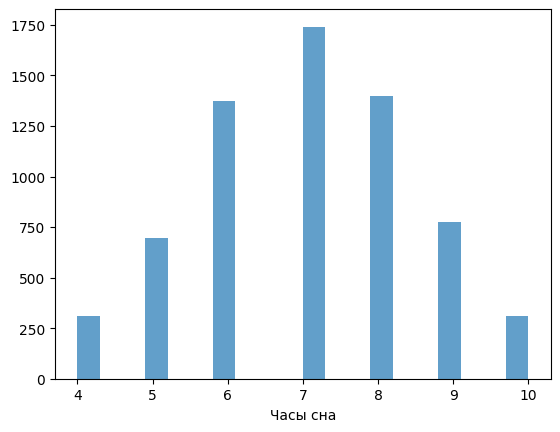

In [32]:
plt.hist(df['Sleep_Hours'], bins=20, alpha=0.7)
plt.xlabel('Часы сна')
plt.show()

Да, похоже на нормальное распределение

2. Постройте гистограмму распределения количества часов затрачиваемых на обучение среди мальчиков и девочек

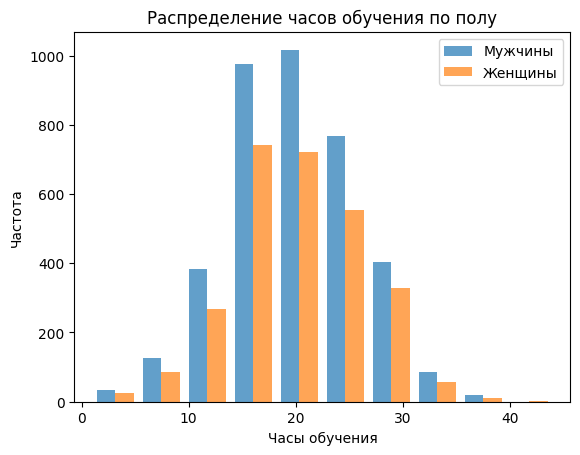

In [33]:
male_hours = df[df['Gender'] == 'Male']['Hours_Studied']
female_hours = df[df['Gender'] == 'Female']['Hours_Studied']
plt.hist([male_hours, female_hours], alpha=0.7, label=['Мужчины', 'Женщины'])
plt.xlabel('Часы обучения')
plt.ylabel('Частота')
plt.title('Распределение часов обучения по полу')
plt.legend()
plt.show()

3. Как зависит результат конечного экзамена от результата первого экзамена

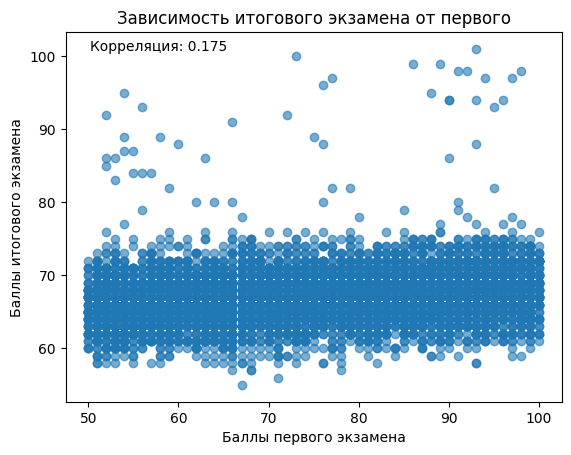

In [35]:
plt.scatter(df['Previous_Scores'], df['Exam_Score'], alpha=0.6)
plt.xlabel('Баллы первого экзамена')
plt.ylabel('Баллы итогового экзамена')
plt.title('Зависимость итогового экзамена от первого')
correlation = df['Previous_Scores'].corr(df['Exam_Score'])
plt.text(0.05, 0.95, f'Корреляция: {correlation:.3f}', transform=plt.gca().transAxes)
plt.show()

корреляция 0.175 - очень слабо влияет

4. Постройте box plot отображающий распределение количества сна детей сдавших экзамены на оценку ниже и выше 85 баллов

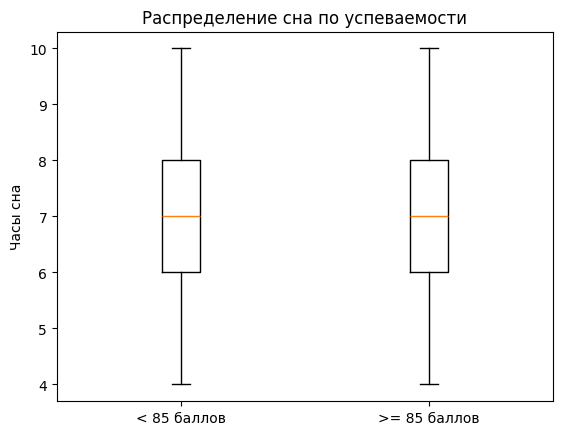

In [37]:
df['high_score'] = df['Exam_Score'] >= 85
plt.boxplot([df[df['high_score'] == False]['Sleep_Hours'], 
             df[df['high_score'] == True]['Sleep_Hours']], 
            labels=['< 85 баллов', '>= 85 баллов'])
plt.ylabel('Часы сна')
plt.title('Распределение сна по успеваемости')
plt.show()

5. Правда ли, что количество посещаемых занятий с репетитором в месяц напрямую влияет на балл в конечном экзамене?

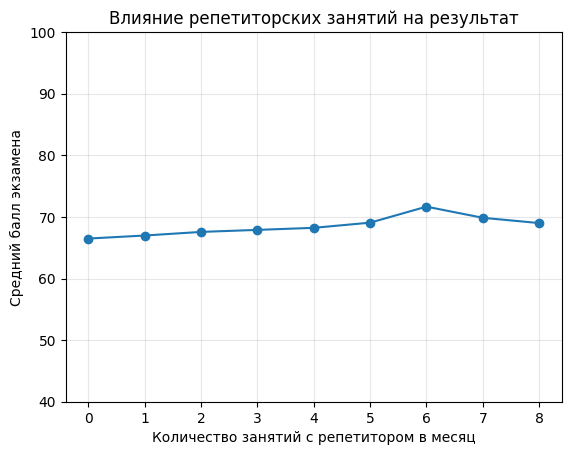

In [41]:
tutoring_scores = df.groupby('Tutoring_Sessions')['Exam_Score'].mean()
plt.plot(tutoring_scores.index, tutoring_scores.values, marker='o')
plt.xlabel('Количество занятий с репетитором в месяц')
plt.ylabel('Средний балл экзамена')
plt.title('Влияние репетиторских занятий на результат')
plt.ylim(40, 100)
plt.grid(True, alpha=0.3)
plt.show()

очень-очень слабо влияет

6. Как физическая активность влияет на успеваемость?

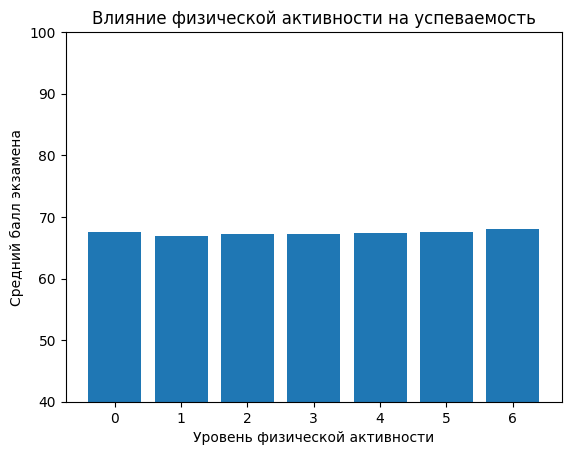

In [44]:
activity_scores = df.groupby('Physical_Activity')['Exam_Score'].mean()
plt.bar(activity_scores.index, activity_scores.values)
plt.xlabel('Уровень физической активности')
plt.ylabel('Средний балл экзамена')
plt.title('Влияние физической активности на успеваемость')
plt.ylim(40, 100)
plt.show()

тоже слабо. грустный датасет. все предрешено( 

7. Постройте HeatMap где ось Х - процент посещаемость, Y - количество занятий с репетитором, а Z - балл за итоговый экзамен*

\* Задание на доп. балл

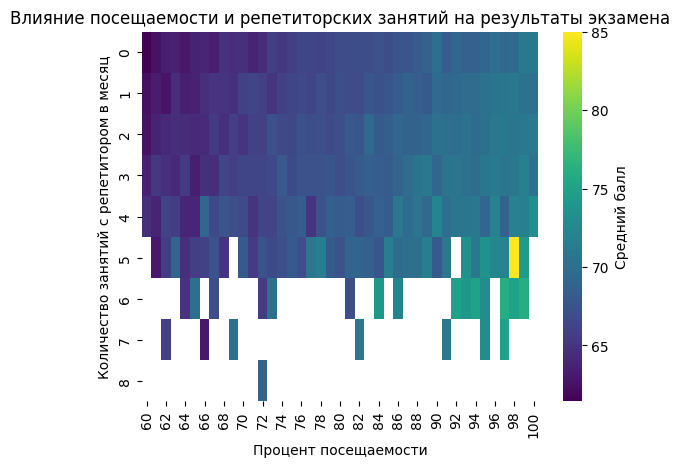

In [51]:
pivot = df.pivot_table(values='Exam_Score', index='Tutoring_Sessions', columns='Attendance', aggfunc='mean')
sns.heatmap(pivot, cmap='viridis', annot=False, cbar_kws={'label': 'Средний балл'})
plt.xlabel('Процент посещаемости')
plt.ylabel('Количество занятий с репетитором в месяц')
plt.title('Влияние посещаемости и репетиторских занятий на результаты экзамена')
plt.show()